In [1]:
library(Seurat)
library(Signac)
library(CellChat)
library(patchwork)
library(argparse)
source("/tscc/projects/ps-epigen/users/kdang/eye_final/source_FunFig.R")
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:Seurat’:

    components


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: ggplot2



In [2]:
sobj<- readRDS("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/250303_humanAT2_organoids_NA.RDS")

In [3]:
sobj

An object of class Seurat 
44696 features across 16578 samples within 2 assays 
Active assay: SCT (21631 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap.rna

In [4]:
DefaultAssay(sobj) <- "SCT"

In [5]:
sobj

An object of class Seurat 
44696 features across 16578 samples within 2 assays 
Active assay: SCT (21631 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap.rna

In [6]:
demux_lib3 <- read.table("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/Demux/250317_AT2_organoid_ZO/popscle_out/JB_1466_1_2.best", header = TRUE, sep = "\t", stringsAsFactors = FALSE)


In [7]:
head(demux_lib3)

,INT_ID,BARCODE,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,BEST.POSTERIOR,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,0,.,7430,36605,DBL,"0_0_2_ZBC2,0_0_3_ZBC3,0.50",-4079.04,"0_0_3_ZBC3,0_0_2_ZBC2,0.50",-4079.04,0,0.0,1.00,0_0_3_ZBC3,-6168.48,0_0_2_ZBC2,-8007.10,0.00000,"0_0_2_ZBC2,0_0_3_ZBC3,0.50",-4079.04,-2089.44
2,3,AAACCAAAGAAGCTAA-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_2_ZBC2,0_0_2_ZBC2,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_2_ZBC2,-0.01,0.05666,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-0.01,0.00
3,18,AAACCAAAGCATCAAT-1,1,1,AMB,"0_0_5_ZBl2,0_0_5_ZBl2,0.00",-0.06,"0_0_6_ZBl3,0_0_6_ZBl3,0.00",-0.06,0,-2.9,0.85,0_0_5_ZBl2,-0.06,0_0_6_ZBl3,-0.06,0.06490,"0_0_5_ZBl2,0_0_6_ZBl3,0.50",-0.06,0.00
4,20,AAACCAAAGCATCTCT-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_2_ZBC2,0_0_2_ZBC2,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_2_ZBC2,-0.01,0.05666,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-0.01,0.00
5,24,AAACCAAAGCCACAGT-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_3_ZBC3,0_0_3_ZBC3,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_3_ZBC3,-0.01,0.05666,"0_0_1_ZBC1,0_0_3_ZBC3,0.50",-0.01,0.00
6,27,AAACCAAAGCCGCATG-1,1,1,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-0.01,"0_0_2_ZBC2,0_0_2_ZBC2,0.00",-0.01,0,-3.1,0.76,0_0_1_ZBC1,-0.01,0_0_2_ZBC2,-0.01,0.05666,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-0.01,0.00


In [8]:
table(demux_lib3$DROPLET.TYPE)


  AMB   DBL   SNG 
35345   449 14505 

In [9]:
rownames(demux_lib3) <- demux_lib3$BARCODE


In [10]:
# Extract barcodes from Seurat object
seurat_barcodes <- rownames(sobj@meta.data)

# Extract barcodes from Demuxlet table
demux_barcodes <- rownames(demux_lib3)

# Print examples of barcodes
cat("Seurat Barcodes (first 10):\n")
print(head(seurat_barcodes, 10))

cat("Demuxlet Barcodes (first 10):\n")
print(head(demux_barcodes, 10))


Seurat Barcodes (first 10):
 [1] "AAACCAAAGCGATCCG-1" "AAACCAAAGGGCTATC-1" "AAACCAAAGTAACGGG-1"
 [4] "AAACCAAAGTTACGCA-1" "AAACCATTCGCGAATC-1" "AAACCATTCGCGACAT-1"
 [7] "AAACCATTCGCGTGAT-1" "AAACCATTCGTGCTCC-1" "AAACCCGCAAGCACAT-1"
[10] "AAACCCGCACCTACGT-1"
Demuxlet Barcodes (first 10):
 [1] "."                  "AAACCAAAGAAGCTAA-1" "AAACCAAAGCATCAAT-1"
 [4] "AAACCAAAGCATCTCT-1" "AAACCAAAGCCACAGT-1" "AAACCAAAGCCGCATG-1"
 [7] "AAACCAAAGCGATCCG-1" "AAACCAAAGCTAGTAT-1" "AAACCAAAGGAATGAC-1"
[10] "AAACCAAAGGAGCTTC-1"


In [11]:
# Find barcodes in Demuxlet but not in Seurat
demux_not_in_seurat <- setdiff(demux_barcodes, seurat_barcodes)

# Find barcodes in Seurat but not in Demuxlet
seurat_not_in_demux <- setdiff(seurat_barcodes, demux_barcodes)

# Print differences
cat("Barcodes in Demuxlet but not in Seurat:\n")
print(head(demux_not_in_seurat, 10))  # Show first 10

cat("Barcodes in Seurat but not in Demuxlet:\n")
print(head(seurat_not_in_demux, 10))  # Show first 10

# Count differences
cat("Number of barcodes in Demuxlet but not in Seurat:", length(demux_not_in_seurat), "\n")
cat("Number of barcodes in Seurat but not in Demuxlet:", length(seurat_not_in_demux), "\n")

Barcodes in Demuxlet but not in Seurat:
 [1] "."                  "AAACCAAAGAAGCTAA-1" "AAACCAAAGCATCAAT-1"
 [4] "AAACCAAAGCATCTCT-1" "AAACCAAAGCCACAGT-1" "AAACCAAAGCCGCATG-1"
 [7] "AAACCAAAGCTAGTAT-1" "AAACCAAAGGAATGAC-1" "AAACCAAAGGAGCTTC-1"
[10] "AAACCAAAGGGTACGA-1"
Barcodes in Seurat but not in Demuxlet:
 [1] "AAACGGGTCTAAGCAT-1" "ACAGCGAAGGTCATCA-1" "ACATGAGGTAGGCGAT-1"
 [4] "ACCACAATCGTGCCAG-1" "CAAGGAACAAATTCCT-1" "CAAGTTTAGCCACGAT-1"
 [7] "CACGGTTAGCAAGGGC-1" "CAGCATATCACATACG-1" "CCGACTAGTAAGCAGC-1"
[10] "CGTCAGTAGGAGGCTA-1"
Number of barcodes in Demuxlet but not in Seurat: 33743 
Number of barcodes in Seurat but not in Demuxlet: 22 


In [12]:
# Keep only rows where barcodes match Seurat object
demux_lib3_subset <- demux_lib3[demux_barcodes %in% seurat_barcodes, , drop = FALSE]

# Verify barcode alignment
cat("Final number of matching barcodes:", nrow(demux_lib3_subset), "\n")

Final number of matching barcodes: 16556 


In [13]:
demux_barcodes <-rownames(demux_lib3_subset)

In [14]:
# Find barcodes in Demuxlet but not in Seurat
demux_not_in_seurat <- setdiff(demux_barcodes, seurat_barcodes)

# Find barcodes in Seurat but not in Demuxlet
seurat_not_in_demux <- setdiff(seurat_barcodes, demux_barcodes)

# Print differences
cat("Barcodes in Demuxlet but not in Seurat:\n")
print(head(demux_not_in_seurat, 10))  # Show first 10

cat("Barcodes in Seurat but not in Demuxlet:\n")
print(head(seurat_not_in_demux, 10))  # Show first 10

# Count differences
cat("Number of barcodes in Demuxlet but not in Seurat:", length(demux_not_in_seurat), "\n")
cat("Number of barcodes in Seurat but not in Demuxlet:", length(seurat_not_in_demux), "\n")

Barcodes in Demuxlet but not in Seurat:
character(0)
Barcodes in Seurat but not in Demuxlet:
 [1] "AAACGGGTCTAAGCAT-1" "ACAGCGAAGGTCATCA-1" "ACATGAGGTAGGCGAT-1"
 [4] "ACCACAATCGTGCCAG-1" "CAAGGAACAAATTCCT-1" "CAAGTTTAGCCACGAT-1"
 [7] "CACGGTTAGCAAGGGC-1" "CAGCATATCACATACG-1" "CCGACTAGTAAGCAGC-1"
[10] "CGTCAGTAGGAGGCTA-1"
Number of barcodes in Demuxlet but not in Seurat: 0 
Number of barcodes in Seurat but not in Demuxlet: 22 


In [15]:
seurat_barcodes<- as.data.frame(seurat_barcodes)
colnames(seurat_barcodes) <- "barcode"
head(seurat_barcodes)

,barcode
,<chr>
1,AAACCAAAGCGATCCG-1
2,AAACCAAAGGGCTATC-1
3,AAACCAAAGTAACGGG-1
4,AAACCAAAGTTACGCA-1
5,AAACCATTCGCGAATC-1
6,AAACCATTCGCGACAT-1


In [16]:
colnames(demux_lib3_subset)[colnames(demux_lib3_subset) == "BARCODE"] <- "barcode"


head(demux_lib3_subset)

,INT_ID,barcode,NUM.SNPS,NUM.READS,DROPLET.TYPE,BEST.GUESS,BEST.LLK,NEXT.GUESS,NEXT.LLK,DIFF.LLK.BEST.NEXT,BEST.POSTERIOR,SNG.POSTERIOR,SNG.BEST.GUESS,SNG.BEST.LLK,SNG.NEXT.GUESS,SNG.NEXT.LLK,SNG.ONLY.POSTERIOR,DBL.BEST.GUESS,DBL.BEST.LLK,DIFF.LLK.SNG.DBL
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
AAACCAAAGCGATCCG-1,33,AAACCAAAGCGATCCG-1,29,64,AMB,"0_0_1_ZBC1,0_0_1_ZBC1,0.00",-10.13,"0_0_3_ZBC3,0_0_3_ZBC3,0.00",-10.22,0.10,-13.0,1,0_0_1_ZBC1,-10.13,0_0_3_ZBC3,-10.22,0.00000,"0_0_1_ZBC1,0_0_3_ZBC3,0.50",-8.78,-1.35
AAACCAAAGGGCTATC-1,61,AAACCAAAGGGCTATC-1,8,84,AMB,"0_0_6_ZBl3,0_0_6_ZBl3,0.00",-2.79,"0_0_5_ZBl2,0_0_5_ZBl2,0.00",-4.58,1.79,-5.3,1,0_0_6_ZBl3,-2.79,0_0_5_ZBl2,-4.58,0.00507,"0_0_5_ZBl2,0_0_6_ZBl3,0.50",-3.60,0.81
AAACCAAAGTAACGGG-1,76,AAACCAAAGTAACGGG-1,35,70,SNG,"0_0_2_ZBC2,0_0_2_ZBC2,0.00",-7.27,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-10.42,3.16,-9.8,1,0_0_2_ZBC2,-7.27,0_0_1_ZBC1,-22.08,0.00006,"0_0_1_ZBC1,0_0_2_ZBC2,0.50",-10.42,3.16
AAACCAAAGTTACGCA-1,102,AAACCAAAGTTACGCA-1,34,62,SNG,"0_0_3_ZBC3,0_0_3_ZBC3,0.00",-11.71,"0_0_1_ZBC1,0_0_3_ZBC3,0.50",-12.34,0.63,-14.0,1,0_0_3_ZBC3,-11.71,0_0_1_ZBC1,-21.12,0.00000,"0_0_1_ZBC1,0_0_3_ZBC3,0.50",-12.34,0.63
AAACCATTCGCGAATC-1,168,AAACCATTCGCGAATC-1,21,24,SNG,"0_0_4_ZBl1,0_0_4_ZBl1,0.00",-7.64,"0_0_1_ZBC1,0_0_4_ZBl1,0.50",-8.93,1.29,-10.0,1,0_0_4_ZBl1,-7.64,0_0_5_ZBl2,-17.48,0.00004,"0_0_1_ZBC1,0_0_4_ZBl1,0.50",-8.93,1.29
AAACCATTCGCGACAT-1,169,AAACCATTCGCGACAT-1,29,46,AMB,"0_0_3_ZBC3,0_0_3_ZBC3,0.00",-7.53,"0_0_6_ZBl3,0_0_6_ZBl3,0.00",-8.11,0.59,-10.0,1,0_0_3_ZBC3,-7.53,0_0_6_ZBl3,-8.11,0.00004,"0_0_3_ZBC3,0_0_6_ZBl3,0.50",-7.43,-0.10


In [17]:

# Join metadata into Seurat object using dplyr's left_join (ensuring alignment)
new_metadata <- sobj@meta.data %>%
  tibble::rownames_to_column(var = "barcode") %>%
  full_join(demux_lib3_subset, by = "barcode") %>%
  tibble::column_to_rownames(var = "barcode")

# Assign updated metadata back to Seurat object
sobj <- AddMetaData(sobj, new_metadata)

# Check if metadata was added correctly
unique(colnames(sobj@meta.data))

[1] "orig.ident"         "nCount_RNA"         "nFeature_RNA"      
 [4] "percent.mt"         "nCount_SCT"         "nFeature_SCT"      
 [7] "SCT_snn_res.1"      "seurat_clusters"    "INT_ID"            
[10] "NUM.SNPS"           "NUM.READS"          "DROPLET.TYPE"      
[13] "BEST.GUESS"         "BEST.LLK"           "NEXT.GUESS"        
[16] "NEXT.LLK"           "DIFF.LLK.BEST.NEXT" "BEST.POSTERIOR"    
[19] "SNG.POSTERIOR"      "SNG.BEST.GUESS"     "SNG.BEST.LLK"      
[22] "SNG.NEXT.GUESS"     "SNG.NEXT.LLK"       "SNG.ONLY.POSTERIOR"
[25] "DBL.BEST.GUESS"     "DBL.BEST.LLK"       "DIFF.LLK.SNG.DBL"


# Join metadata into Seurat object using dplyr's left_join (ensuring alignment)
new_metadata <- sobj@meta.data %>%
  tibble::rownames_to_column(var = "barcode") %>%
  left_join(demux_lib3_subset, by = "barcode") %>%
  tibble::column_to_rownames(var = "barcode")

# Assign updated metadata back to Seurat object
sobj <- AddMetaData(sobj, new_metadata)

# Check if metadata was added correctly
unique(colnames(sobj@meta.data))


In [18]:
sobj

An object of class Seurat 
44696 features across 16578 samples within 2 assays 
Active assay: SCT (21631 features, 5000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap.rna

table(sobj$DROPLET.TYPE) ## LEFT JOIN

In [19]:
table(sobj$DROPLET.TYPE)


  AMB   DBL   SNG 
 2496   437 13623 

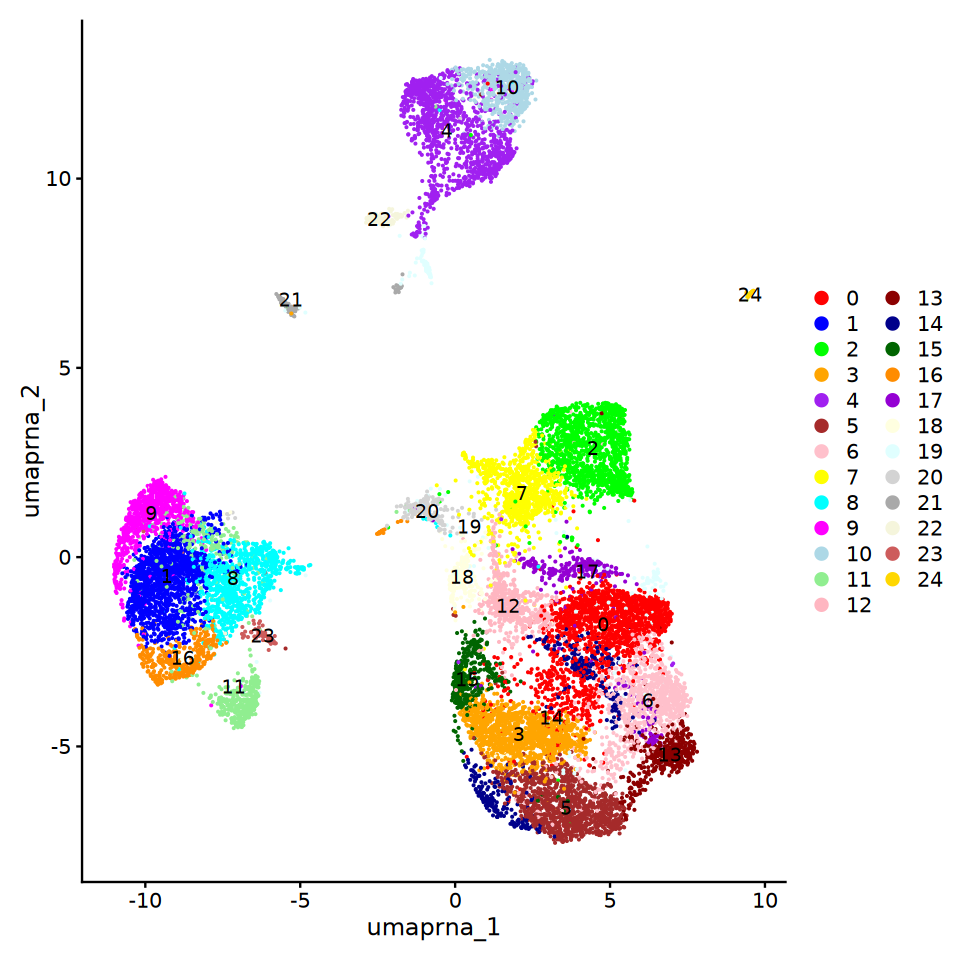

In [20]:
colors_24 <- c(
  "red", "blue", "green", "orange", "purple", "brown", "pink", "yellow", "cyan", "magenta",
  "lightblue", "lightgreen", "lightpink", "darkred", "darkblue", "darkgreen", "darkorange", "darkviolet",
  "lightyellow", "lightcyan", "lightgrey", "darkgrey", "beige", "indianred", "gold"
)

options(repr.plot.width=8, repr.plot.height=8)
DimPlot(sobj, reduction = "umap.rna", cols = colors_24, label = TRUE)

In [21]:
table(sobj$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1708 1464 1339 1318 1251 1163  955  945  917  825  634  586  531  449  391  388 
  16   17   18   19   20   21   22   23   24 
 383  325  238  224  160  138  133   67   46 

In [22]:
table(sobj$SNG.BEST.GUESS)


0_0_1_ZBC1 0_0_2_ZBC2 0_0_3_ZBC3 0_0_4_ZBl1 0_0_5_ZBl2 0_0_6_ZBl3 
      1529       2878       7988        937       2060       1164 

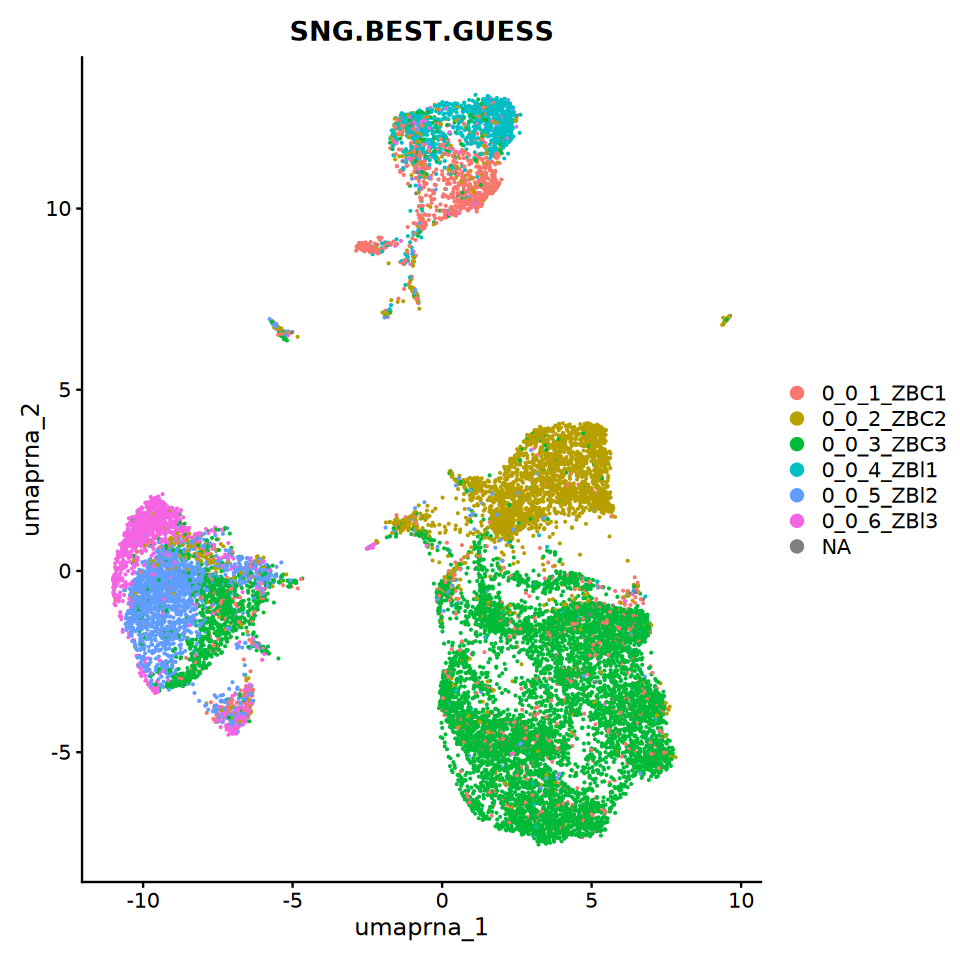

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(sobj, reduction = "umap.rna", group.by = "SNG.BEST.GUESS")

In [24]:
setwd("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/rds_objs/")


In [25]:
all(rownames(sobj@meta.data) == demux_lib3_subset)

[1] FALSE

In [26]:
saveRDS(sobj,"JB_1466_w_demux_data.RDS")

# IGNORE

options(repr.plot.width=30, repr.plot.height=8)

pdf(file = "/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/nFeature_nCount_RNA_percent.mt.pdf", width = 30, height = 8)
options(repr.plot.width=30, repr.plot.height=8)
# Visualize QC metrics as a violin plot
VlnPlot(sobj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
dev.off()

new_rownames <- seurat_barcodes[match(rownames(demux_lib3_subset), demux_barcodes)]



# Check for NA values
if (any(is.na(new_rownames))) {
  warning("Some barcodes did not match between demux_lib3_subset and seurat_barcodes")
}

# Assign the new row names
rownames(demux_lib3_subset) <- new_rownames


head(demux_lib3_subset)
head(sobj)

tail(demux_lib3_subset)
tail(sobj)

all(rownames(sobj@meta.data) == demux_lib3_subset)


# Add metadata to Seurat object
sobj <- AddMetaData(sobj, metadata = demux_lib3_subset)

sobj

options(repr.plot.width=8, repr.plot.height=8)
pdf(file = "/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/SCT/umap_rna.pdf")
DimPlot(sobj, reduction = "umap.rna")
dev.off()

options(repr.plot.width=8, repr.plot.height=8)
DimPlot(sobj, reduction = "umap.rna")

unique(sobj@meta.data)

# find markers for every cluster compared to all remaining cells, report only the positive
# ones
sobj.markers <- FindAllMarkers(sobj, only.pos = TRUE)
sobj.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

write.csv(sobj.markers, "/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/250225_humanAT2_organoids/data/FindAllMarkers.csv")

# Extract the base file name without extension
base_name <- "250225_humanAT2_organoids/data/FindAllMarkers"

# Write the data to a CSV file
write.csv(sobj.markers, paste0("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/", base_name, ".csv"))

# Write the data to an HTML file using knitr::kable
library(knitr)
html_output <- paste0("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/", base_name, ".html")
kable(sobj.markers, format = "html") %>% 
  cat(file = html_output)

  # Write the data to a plain text file (tab-delimited)
text_output <- paste0("/tscc/projects/ps-epigen/users/a2jorgensen/sandbox/", base_name, ".txt")
write.table(sobj.markers, file = text_output, sep = "\t", row.names = FALSE, col.names = TRUE, quote = FALSE)


In [27]:
unique(sobj$orig.ident)

[1] AT2_organ
Levels: AT2_organ

In [28]:
table(sobj$DROPLET.TYPE)


  AMB   DBL   SNG 
 2496   437 13623 

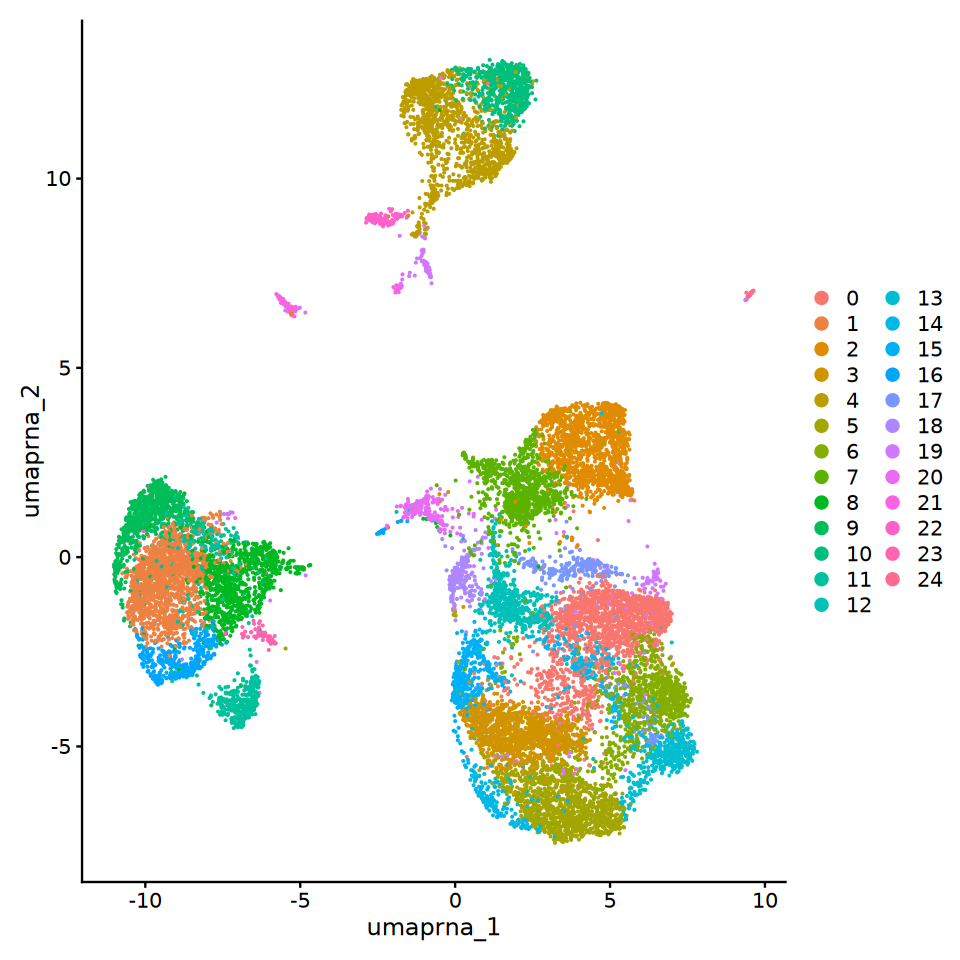

In [29]:
DimPlot(sobj, reduction = "umap.rna", )